Comcast Telecom Consumer Complaints ..
Project 2 

DESCRIPTION

Comcast is an American global telecommunication company. The firm has been providing terrible customer service. They continue to fall short despite repeated promises to improve. Only last month (October 2016) the authority fined them a $2.3 million, after receiving over 1000 consumer complaints.
The existing database will serve as a repository of public customer complaints filed against Comcast.
It will help to pin down what is wrong with Comcast's customer service.

Data Dictionary

Ticket #: Ticket number assigned to each complaint
Customer Complaint: Description of complaint
Date: Date of complaint
Time: Time of complaint
Received Via: Mode of communication of the complaint
City: Customer city
State: Customer state
Zipcode: Customer zip
Status: Status of complaint
Filing on behalf of someone
Analysis Task

To perform these tasks, you can use any of the different Python libraries such as NumPy, SciPy, Pandas, scikit-learn, matplotlib, and BeautifulSoup.

- Import data into Python environment.
- Provide the trend chart for the number of complaints at monthly and daily granularity levels.
- Provide a table with the frequency of complaint types.

Which complaint types are maximum i.e., around internet, network issues, or across any other domains.
- Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.
- Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3. Provide insights on:

Which state has the maximum complaints
Which state has the highest percentage of unresolved complaints
- Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.

The analysis results to be provided with insights wherever applicable.

# Import data in python environment

In [122]:
#Import the necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np


In [123]:
ccdf= pd.read_csv('Comcast_telecom_complaints_data.csv')

In [124]:
ccdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Ticket #                     2224 non-null   object
 1   Customer Complaint           2224 non-null   object
 2   Date                         2224 non-null   object
 3   Date_month_year              2224 non-null   object
 4   Time                         2224 non-null   object
 5   Received Via                 2224 non-null   object
 6   City                         2224 non-null   object
 7   State                        2224 non-null   object
 8   Zip code                     2224 non-null   int64 
 9   Status                       2224 non-null   object
 10  Filing on Behalf of Someone  2224 non-null   object
dtypes: int64(1), object(10)
memory usage: 191.2+ KB


In [125]:
ccdf.describe()

Zip code
count   2224.000000
mean   47994.393435
std    28885.279427
min     1075.000000
25%    30056.500000
50%    37211.000000
75%    77058.750000
max    99223.000000

In [126]:
ccdf.head()

Ticket #                                 Customer Complaint      Date  \
0   250635                      Comcast Cable Internet Speeds  22-04-15   
1   223441       Payment disappear - service got disconnected  04-08-15   
2   242732                                  Speed and Service  18-04-15   
3   277946  Comcast Imposed a New Usage Cap of 300GB that ...  05-07-15   
4   307175         Comcast not working and no service to boot  26-05-15   

  Date_month_year         Time        Received Via      City     State  \
0       22-Apr-15   3:53:50 PM  Customer Care Call  Abingdon  Maryland   
1       04-Aug-15  10:22:56 AM            Internet   Acworth   Georgia   
2       18-Apr-15   9:55:47 AM            Internet   Acworth   Georgia   
3       05-Jul-15  11:59:35 AM            Internet   Acworth   Georgia   
4       26-May-15   1:25:26 PM            Internet   Acworth   Georgia   

   Zip code  Status Filing on Behalf of Someone  
0     21009  Closed                          No  
1     30102  Closed                          No  
2     30101  Closed                         Yes  
3     30101    Open                         Yes  
4     30101  Solved                          No

# Provide the trend chart for the number of complaints at monthly and daily granularity levels.

In [128]:
ccdf['month']= ccdf['Date_month_year'].apply(lambda x: x.split('-')[1])

In [130]:
ccdf['month'].value_counts()[:3]

Jun    1046
Apr     375
May     317
Name: month, dtype: int64

/usr/local/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


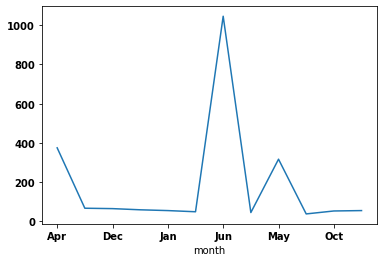

In [94]:
countdf=ccdf.groupby(by=ccdf['month'])['Ticket #'].count().plot()

<AxesSubplot:xlabel='Date', ylabel='count'>

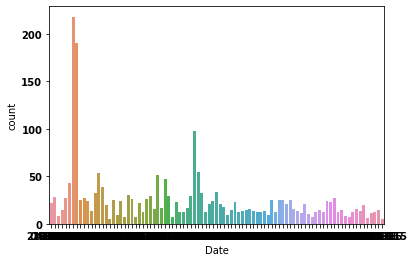

In [95]:
sns.countplot(x=ccdf['Date'], data= ccdf)

In [133]:
ccdf['Date'].value_counts()[:3]

24-06-15    218
23-06-15    190
25-06-15     98
Name: Date, dtype: int64

In [135]:
ccdf['Date'].value_counts()[-3:]

04-05-15    6
04-11-15    5
05-03-15    5
Name: Date, dtype: int64

/usr/local/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


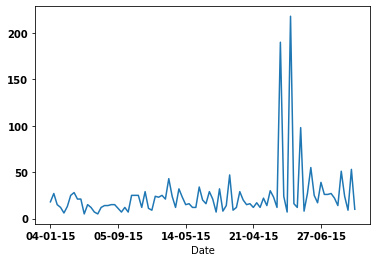

In [96]:
countdf=ccdf.groupby(by=ccdf['Date'])['Ticket #'].count().plot()

# Provide a table with the frequency of complaint types.

In [97]:
from nltk.corpus import stopwords
import string

In [98]:
def textPreprocessing(data):
    #Remove Punctuations
    removeP = [ c for c in data if c not in string.punctuation ] #List Comprehension
    sentences = ''.join(removeP)
    #Convert Sentences to Words
    words = sentences.split(" ")
    #Remove Stopwords
    vocabulary = [ word for word in words if word not in stopwords.words('english') ]
    #Return Vocabulary
    return vocabulary

In [99]:
from sklearn.feature_extraction.text import CountVectorizer
wordvector = CountVectorizer(analyzer=textPreprocessing)# Does both Preprocessing and Bow
finalWordVector=wordvector.fit(ccdf['Customer Complaint'])
bow=finalWordVector.transform(ccdf['Customer Complaint'])

In [100]:
obj=finalWordVector.vocabulary_
obj

{'Comcast': 246,
 'Cable': 205,
 'Internet': 533,
 'Speeds': 877,
 'Payment': 708,
 'disappear': 1283,
 '': 0,
 'service': 1824,
 'got': 1411,
 'disconnected': 1289,
 'Speed': 874,
 'Service': 845,
 'Imposed': 503,
 'New': 644,
 'Usage': 973,
 'Cap': 216,
 '300GB': 38,
 'punishes': 1715,
 'streaming': 1870,
 'working': 2017,
 'boot': 1133,
 'ISP': 494,
 'Charging': 230,
 'arbitrary': 1083,
 'data': 1252,
 'limits': 1529,
 'overage': 1631,
 'fees': 1373,
 'Throttling': 932,
 'unreasonable': 1963,
 'caps': 1163,
 'refuses': 1751,
 'help': 1420,
 'troubleshoot': 1940,
 'correct': 1232,
 'extended': 1357,
 'outages': 1624,
 'Raising': 764,
 'Prices': 732,
 'Not': 651,
 'Being': 156,
 'Available': 135,
 'To': 936,
 'Ask': 127,
 'Why': 1007,
 'Billing': 159,
 'asked': 1089,
 'YAHOO': 1029,
 'FAILURE': 395,
 'TO': 907,
 'RESTORE': 761,
 'EMAIL': 360,
 'SEARCH': 821,
 'FEATURE': 400,
 'Violating': 984,
 'Open': 673,
 'Rules': 814,
 'Blocking': 168,
 'HBO': 453,
 'Go': 446,
 'Access': 93,
 'Son

In [101]:
series=pd.Series(obj)
Complaintdf=pd.DataFrame(series,columns=['complaintCount'])
Complaintdf.reset_index(inplace=True)
Complaintdf.columns=['complaintType','complaintCount']
Complaintdf

complaintType  complaintCount
0             Comcast             246
1               Cable             205
2            Internet             533
3              Speeds             877
4             Payment             708
...               ...             ...
2025  AdvertisingBait             106
2026            check            1179
2027           output            1627
2028      unsatisfied            1970
2029        Ypsilanti            1034

[2030 rows x 2 columns]

In [102]:
#yet ,years, year are stop words so deleted the rows of those
Complaintdf.iloc[Complaintdf.complaintCount.argmax()]



complaintType      yet
complaintCount    2029
Name: 579, dtype: object

In [103]:
Complaintdf.drop(Complaintdf.complaintCount.argmax(),axis=0,inplace=True)

In [104]:
Complaintdf.iloc[Complaintdf.complaintCount.argmax()]



complaintType     years
complaintCount     2028
Name: 569, dtype: object

In [105]:
Complaintdf.drop(Complaintdf.complaintCount.argmax(),axis=0,inplace=True)

# Which complaint types are maximum i.e., around internet, network issues, or across any other domains.

# Xfinity is the domain which received maximum number of complaints

In [106]:
Complaintdf.iloc[Complaintdf.complaintCount.argmax()]



complaintType     year
complaintCount    2027
Name: 154, dtype: object

In [107]:
Complaintdf.drop(Complaintdf.complaintCount.argmax(),axis=0,inplace=True)
Complaintdf.sort_values(by='complaintCount',ascending=False).head(1)

complaintType  complaintCount
299       xfinity            2026

# Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.

In [108]:
#Created a new column UpdatedStatus having categorical variables Open and Closed 
ccdf['UpdatedStatus']=ccdf.Status.apply(lambda x : 'Open' if (( x=='Open')|( x=='Pending')) else 'Closed')

In [109]:
#The state which received maximum complaints
ccdf.groupby(by='State')['Customer Complaint'].count().sort_values(ascending=False).head(1)

State
Georgia    288
Name: Customer Complaint, dtype: int64

In [110]:
# Dataframe with only State and Updated status(Open and Closed Status)
newdf= ccdf[['State','UpdatedStatus']]
Opendf=newdf[newdf['UpdatedStatus']=='Open']
Closeddf=newdf[newdf['UpdatedStatus']=='Closed']

Opendf.rename(columns={'State': 'Stateopen','UpdatedStatus' : 'OpenStatus'},inplace=True)


/usr/local/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [111]:
Closeddf.State.nunique()

Closeddf.rename(columns={'State': 'Stateclosed','UpdatedStatus' : 'ClosedStatus'},inplace=True)


In [112]:
df=pd.concat([Closeddf,Opendf],axis=1)
Statusdf=pd.concat([df,ccdf['State']],axis=1)
Statusdf.drop(['Stateclosed','Stateopen'],axis=1)
# data frame which contain Closed and Open status columns of complaints for every state
Statusdf

Stateclosed ClosedStatus Stateopen OpenStatus     State
0       Maryland       Closed       NaN        NaN  Maryland
1        Georgia       Closed       NaN        NaN   Georgia
2        Georgia       Closed       NaN        NaN   Georgia
3            NaN          NaN   Georgia       Open   Georgia
4        Georgia       Closed       NaN        NaN   Georgia
...          ...          ...       ...        ...       ...
2219     Florida       Closed       NaN        NaN   Florida
2220    Michigan       Closed       NaN        NaN  Michigan
2221    Michigan       Closed       NaN        NaN  Michigan
2222    Michigan       Closed       NaN        NaN  Michigan
2223         NaN          NaN  Michigan       Open  Michigan

[2224 rows x 5 columns]

In [113]:
#dataframe of Count of closed status for every state
StateWiseClosed=Statusdf.groupby(by='State')['ClosedStatus'].count().to_frame()
#dataframe of Count of open status for every state
StateWiseOpen=Statusdf.groupby(by='State')['OpenStatus'].count().to_frame()

In [114]:
# Converted a dataframe to np array
npClosed=StateWiseClosed.values.ravel() #np array of closed status count
npOpen=StateWiseOpen.values.ravel()#np array of open status count
#np array for state
StateWiseOpen.index

Index(['Alabama', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'District Of Columbia',
       'District of Columbia', 'Florida', 'Georgia', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri',
       'Montana', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
       'New York', 'North Carolina', 'Ohio', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'Tennessee', 'Texas', 'Utah',
       'Vermont', 'Virginia', 'Washington', 'West Virginia'],
      dtype='object', name='State')

# From the stacked bar charts the insights are :
## 1. The State with maxmum number of complaints is Georgia
## 2.The state with highest percentage of unresolved complaints is Georgia

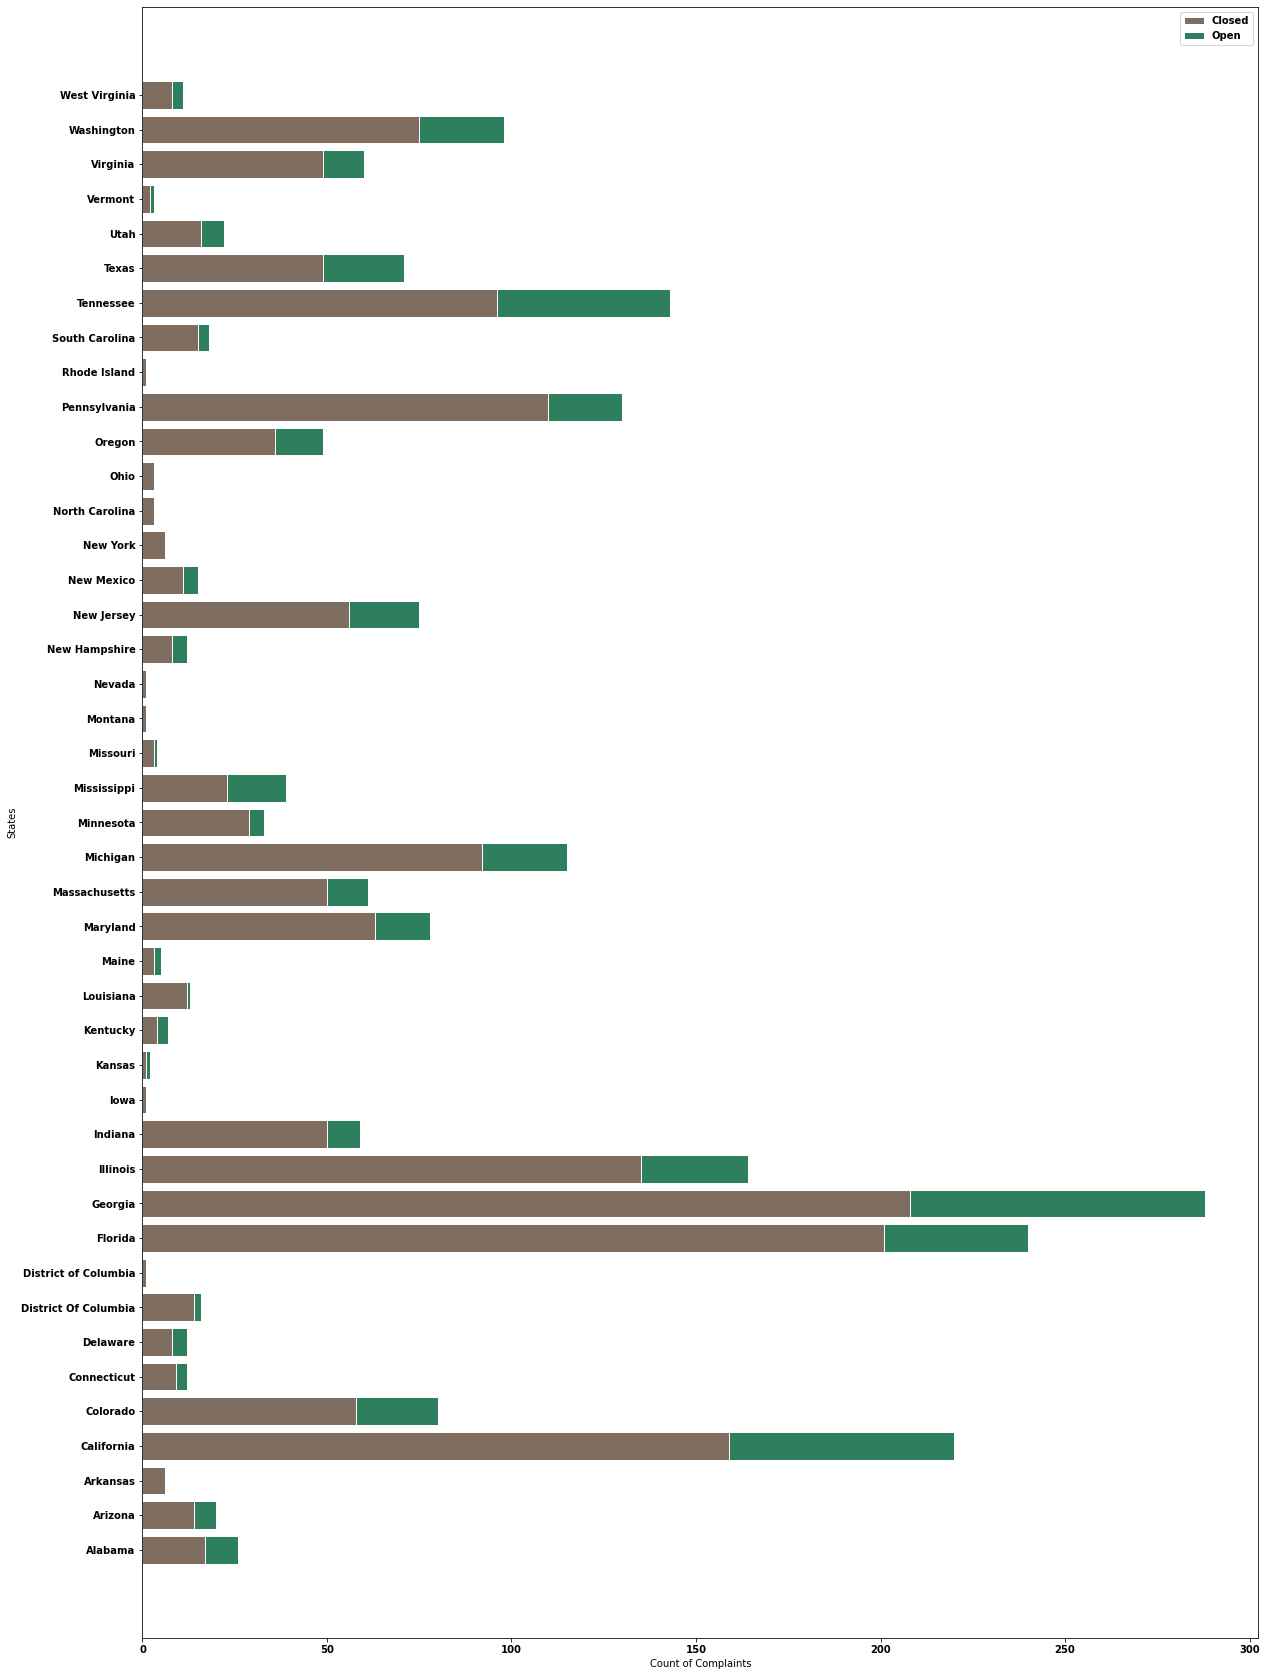

In [115]:
#indices in the barchart
r=np.arange(43)
# Create brown bars
plt.figure(figsize=(20,30))
p1=plt.barh( r,npClosed, color='#7f6d5f', edgecolor='white')
# Create green bars (top)
p2=plt.barh(r,npOpen,left=npClosed, color='#2d7f5e', edgecolor='white')
 
# Custom Y axis
plt.yticks(r, StateWiseOpen.index, fontweight='bold')
plt.ylabel("States")
plt.xlabel('Count of Complaints')
plt.legend((p1[0],p2[0]),('Closed','Open'))

In [116]:
from matplotlib import rc
# y-axis in bold
rc('font', weight='bold')


In [117]:
Resolvedtilldatedf = ccdf[['UpdatedStatus','Received Via']]

In [118]:
#Only two modes of communication of complaint is there (Internet and Customer care calls)
Resolvedtilldatedf['Received Via'].nunique()

2

In [119]:
# The percentage of complaints resolved till date, which were received through the Internet and customer care calls.
Resolved = Resolvedtilldatedf[Resolvedtilldatedf['UpdatedStatus']=='Closed'].UpdatedStatus.count()
Total =Resolvedtilldatedf.UpdatedStatus.count()

In [120]:
Percentage = (Resolved/Total)*100

In [121]:
print("{} percentage of complaints resolved till date, which were received through the Internet and customer care calls.".format(Percentage))

76.75359712230215 percentage of complaints resolved till date, which were received through the Internet and customer care calls.
